## DAY 1

In [15]:
hsbdemo = read.csv("hsb2.csv")
head(hsbdemo)

,id,gender,race,ses,schtyp,prog,read,write,math,science,socst
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,70,male,white,low,public,general,57,52,41,47,57
2,121,female,white,middle,public,vocational,68,59,53,63,61
3,86,male,white,high,public,general,44,33,54,58,31
4,141,male,white,high,public,vocational,63,44,47,53,56
5,172,male,white,middle,public,academic,47,52,57,53,61
6,113,male,white,middle,public,academic,44,52,51,63,61


In [16]:
with(hsbdemo, table(ses, prog))

        prog
ses      academic general vocational
  high         42       9          7
  low          19      16         12
  middle       44      20         31

In [17]:
with(hsbdemo, do.call(rbind, tapply(write, prog, function(x) c(M = mean(x), SD = sd(x)))))

,M,SD
academic,56.25714,7.943343
general,51.33333,9.397775
vocational,46.76000,9.318754


In [18]:
library(nnet)

In [20]:
model1 <- multinom(prog ~ ses + write, data = hsbdemo)

# weights:  15 (8 variable)
initial  value 219.722458 
iter  10 value 179.983731
final  value 179.981726 
converged


In [21]:
summary(model1)

Call:
multinom(formula = prog ~ ses + write, data = hsbdemo)

Coefficients:
           (Intercept)    seslow sesmiddle       write
general       1.689478 1.1628411 0.6295638 -0.05793086
vocational    4.235574 0.9827182 1.2740985 -0.11360389

Std. Errors:
           (Intercept)    seslow sesmiddle      write
general       1.226939 0.5142211 0.4650289 0.02141101
vocational    1.204690 0.5955688 0.5111119 0.02222000

Residual Deviance: 359.9635 
AIC: 375.9635 

In [22]:
exp(coef(model1))

,(Intercept),seslow,sesmiddle,write
general,5.416653,3.199009,1.876792,0.9437152
vocational,69.101326,2.671709,3.575477,0.8926115


## DAY 2 - KNN Classification 

In [5]:
install.packages('ggvis')

Installing package into ‘/home/ajaynagarajm/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘shiny’




In [23]:
library(ggvis)

In [24]:
# Iris scatterplot
iris %>% ggvis(~Sepal.Length, ~Sepal.Width, fill = ~Species)

Guessing layer_points()



In [26]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [27]:
set.seed(1234)

In [28]:
ind <- sample(2, nrow(iris), replace=TRUE, prob=c (0.67, 0.33))

In [29]:
iris.training <- iris[ind==1, 1:4]
iris.test <- iris[ind==2, 1:4]

In [30]:
iris.trainLabels <- iris[ind==1,5]
iris.testLabels <- iris[ind==2,5]

In [31]:
library(class)
iris_pred <- knn(train = iris.training, test = iris.test, cl =
iris.trainLabels, k=3)

In [32]:
summary(iris_pred)

setosa versicolor  virginica 
        12         13         15

In [33]:
# install.packages('gmodels')

Installing package into ‘/home/ajaynagarajm/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)



In [34]:
library(gmodels)
CrossTable(x=iris_pred, y=iris.testLabels, prop.chisq =FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  40 

 
             | iris.testLabels 
   iris_pred |     setosa | versicolor |  virginica |  Row Total | 
-------------|------------|------------|------------|------------|
      setosa |         12 |          0 |          0 |         12 | 
             |      1.000 |      0.000 |      0.000 |      0.300 | 
             |      1.000 |      0.000 |      0.000 |            | 
             |      0.300 |      0.000 |      0.000 |            | 
-------------|------------|------------|------------|------------|
  versicolor |          0 |         12 |          1 |         13 | 
             |      0.000 |      0.923 |      0.077 |      0.325 | 
             |      0.000 |      1.000 |      0.062 |            | 
             |      0.000 |      0.300 |      0.025 |         

In [35]:
library(ggplot2)


Attaching package: ‘ggplot2’


The following object is masked from ‘package:ggvis’:

    resolution


The following object is masked from ‘package:randomForest’:

    margin




In [36]:
idata <- read.csv('iris.data.csv')
head(idata)

,SepelLength,SepelWidth,PetalLength,PetalWidth,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa


In [37]:
library(ggplot2)

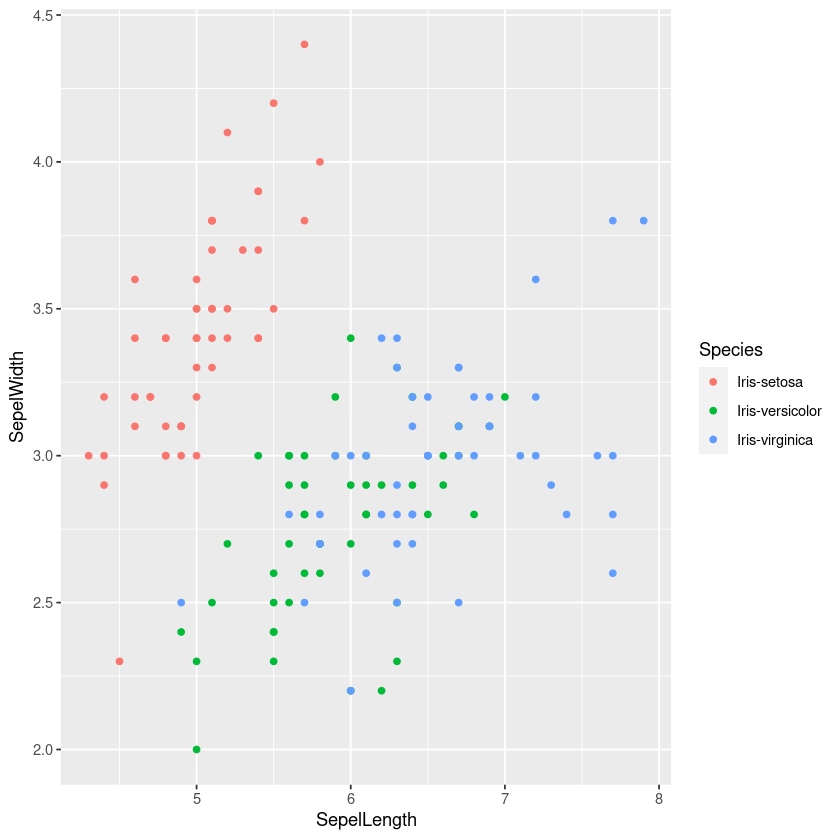

In [38]:
ggplot(idata, aes(x = SepelLength, y = SepelWidth, color = Species))+geom_point()

## Day 3 - Decision Tree

In [40]:
balloon <- read.csv('yellow-small.data.csv')
head(balloon)

,Color,Size,Act,Age,Inflated
,<chr>,<chr>,<chr>,<chr>,<lgl>
1,YELLOW,SMALL,STRETCH,ADULT,TRUE
2,YELLOW,SMALL,STRETCH,CHILD,TRUE
3,YELLOW,SMALL,DIP,ADULT,TRUE
4,YELLOW,SMALL,DIP,CHILD,TRUE
5,YELLOW,SMALL,STRETCH,ADULT,TRUE
6,YELLOW,SMALL,STRETCH,CHILD,TRUE


In [42]:
balloon$Color <- factor(balloon$Color)
balloon$Size <- factor(balloon$Size)
balloon$Act <- factor(balloon$Act)
balloon$Age <- factor(balloon$Age)
balloon$Inflated <- factor(balloon$Inflated)

In [43]:
is.factor(balloon$Size)

[1] TRUE

In [12]:
# install.packages('party', dep=TRUE)

Installing package into ‘/home/ajaynagarajm/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)



In [46]:
library(party)

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich



In [47]:
View(balloon)
Inflated.Tree <- ctree(Inflated~., data = balloon)

Color,Size,Act,Age,Inflated
<fct>,<fct>,<fct>,<fct>,<fct>
YELLOW,SMALL,STRETCH,ADULT,TRUE
YELLOW,SMALL,STRETCH,CHILD,TRUE
YELLOW,SMALL,DIP,ADULT,TRUE
YELLOW,SMALL,DIP,CHILD,TRUE
YELLOW,SMALL,STRETCH,ADULT,TRUE
YELLOW,SMALL,STRETCH,CHILD,TRUE
YELLOW,SMALL,DIP,ADULT,TRUE
YELLOW,SMALL,DIP,CHILD,TRUE
YELLOW,LARGE,STRETCH,ADULT,FALSE


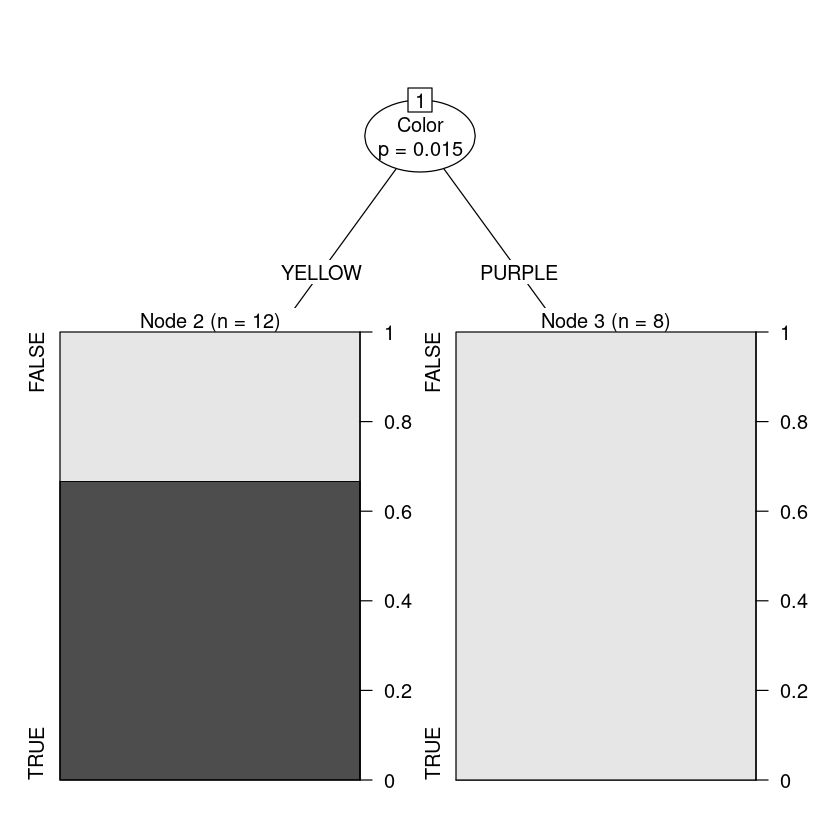

In [48]:
plot(Inflated.Tree)

## Day 4 - Random Forest

In [1]:
bank <- read.csv('bank.csv')
head(bank)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
6,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no


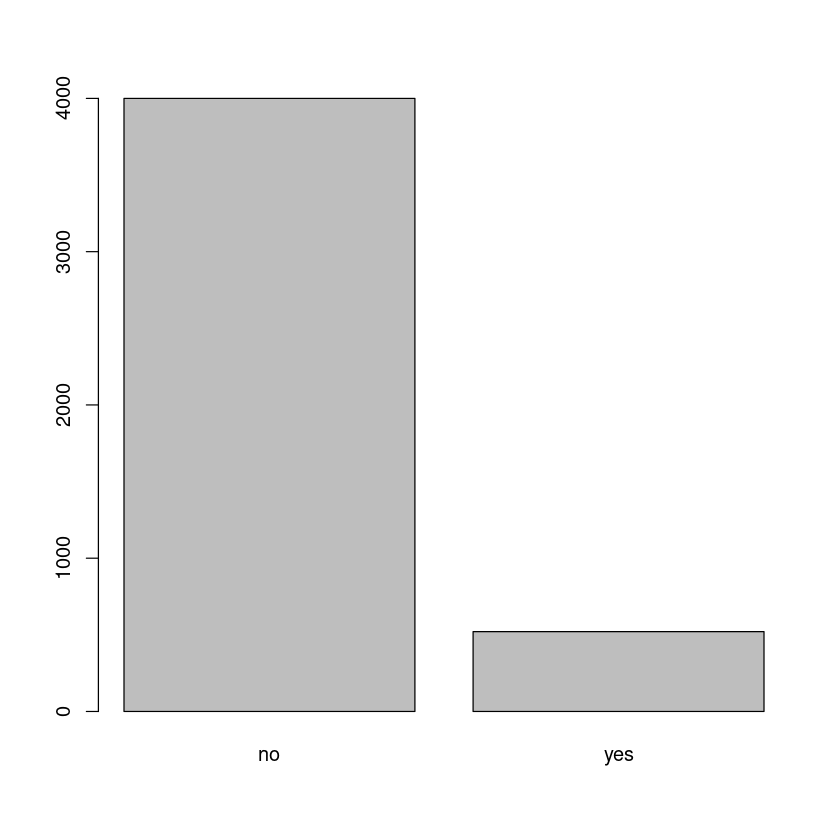

In [2]:
barplot(table(bank$y))

In [3]:
bank$y <- factor(bank$y)

In [4]:
set.seed(1234)
population <- sample(nrow(bank), 0.75 * nrow(bank))
train <- bank[population, ]
test <- bank[-population, ]

In [5]:
# install.packages('randomForest')

In [6]:
library(randomForest)
model <- randomForest(y ~ ., data = train)
model

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.




Call:
 randomForest(formula = y ~ ., data = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 10.18%
Confusion matrix:
      no yes class.error
no  2925  69  0.02304609
yes  276 120  0.69696970

In [7]:
prediction <- predict(model, newdata = test)
table(prediction, test$y)

          
prediction  no yes
       no  982  92
       yes  24  33

In [10]:
library(caret)

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin


Loading required package: lattice



In [12]:
cm <- confusionMatrix(prediction, test$y)
cm

Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  982  92
       yes  24  33
                                          
               Accuracy : 0.8974          
                 95% CI : (0.8783, 0.9145)
    No Information Rate : 0.8895          
    P-Value [Acc > NIR] : 0.2113          
                                          
                  Kappa : 0.3152          
                                          
 Mcnemar's Test P-Value : 4.946e-10       
                                          
            Sensitivity : 0.9761          
            Specificity : 0.2640          
         Pos Pred Value : 0.9143          
         Neg Pred Value : 0.5789          
             Prevalence : 0.8895          
         Detection Rate : 0.8683          
   Detection Prevalence : 0.9496          
      Balanced Accuracy : 0.6201          
                                          
       'Positive' Class : no              
                              

<label style="color: red; font-weight:bold">Test (Rough Work)</label>

In [63]:
data <- c("ajay", "Akash", "Ninad", "Pranav", "Pranav", "ajay")
data
is.factor(data)

[1] "ajay"   "Akash"  "Ninad"  "Pranav" "Pranav" "ajay"

[1] FALSE

In [64]:
fact_data <- factor(data)
fact_data

[1] ajay   Akash  Ninad  Pranav Pranav ajay  
Levels: ajay Akash Ninad Pranav

## Day 5 - Naive Bayes Classifier  

In [13]:
golf <- read.csv('golf_df.csv')
head(golf)

,Outlook,Temperature,Humidity,Windy,Play
,<chr>,<chr>,<chr>,<chr>,<chr>
1,sunny,hot,high,false,no
2,sunny,hot,high,true,no
3,overcast,hot,high,false,yes
4,rainy,mild,high,false,yes
5,rainy,cool,normal,false,yes
6,rainy,cool,normal,true,no


In [24]:
golf$Play <- factor(golf$Play)

In [25]:
install.packages('e1071')
library(e1071)

Installing package into ‘/home/ajaynagarajm/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)



In [26]:
set.seed(123)
id <- sample(2, nrow(golf), prob = c(0.7, 0.3), replace = T)
golfTrain <- golf[id ==1,]
golfTest <- golf[id ==2,]

In [27]:
View(golfTest)
View(golfTrain)

,Outlook,Temperature,Humidity,Windy,Play
,<chr>,<chr>,<chr>,<chr>,<fct>
2,sunny,hot,high,true,no
4,rainy,mild,high,false,yes
5,rainy,cool,normal,false,yes
8,sunny,mild,high,false,no
11,sunny,mild,normal,true,yes


,Outlook,Temperature,Humidity,Windy,Play
,<chr>,<chr>,<chr>,<chr>,<fct>
1,sunny,hot,high,false,no
3,overcast,hot,high,false,yes
6,rainy,cool,normal,true,no
7,overcast,cool,normal,true,yes
9,sunny,cool,normal,false,yes
10,rainy,mild,normal,false,yes
12,overcast,mild,high,true,yes
13,overcast,hot,normal,false,yes
14,rainy,mild,high,true,no


In [28]:
golfModel <- naiveBayes(Play~., data = golfTrain)
print(golfModel)


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
       no       yes 
0.3333333 0.6666667 

Conditional probabilities:
     Outlook
Y      overcast     rainy     sunny
  no  0.0000000 0.6666667 0.3333333
  yes 0.6666667 0.1666667 0.1666667

     Temperature
Y          cool       hot      mild
  no  0.3333333 0.3333333 0.3333333
  yes 0.3333333 0.3333333 0.3333333

     Humidity
Y          high    normal
  no  0.6666667 0.3333333
  yes 0.3333333 0.6666667

     Windy
Y         false      true
  no  0.3333333 0.6666667
  yes 0.6666667 0.3333333



In [29]:
prediction <- predict(golfModel, newdata = golfTest)
prediction <- factor(prediction)

In [30]:
confusionMatrix(prediction, golfTest$Play)

Confusion Matrix and Statistics

          Reference
Prediction no yes
       no   2   2
       yes  0   1
                                          
               Accuracy : 0.6             
                 95% CI : (0.1466, 0.9473)
    No Information Rate : 0.6             
    P-Value [Acc > NIR] : 0.6826          
                                          
                  Kappa : 0.2857          
                                          
 Mcnemar's Test P-Value : 0.4795          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.3333          
         Pos Pred Value : 0.5000          
         Neg Pred Value : 1.0000          
             Prevalence : 0.4000          
         Detection Rate : 0.4000          
   Detection Prevalence : 0.8000          
      Balanced Accuracy : 0.6667          
                                          
       'Positive' Class : no              
                                 